# LAT LONG ALTITUDE:

### Latitude (Lat):
* Specifies the north-south position on Earth.
* Ranges from -90° (South Pole) to +90° (North Pole).
* Measured in degrees.

### Longitude (Lon):
* Specifies the east-west position on Earth.
* Ranges from -180° (West) to +180° (East).
* Measured in degrees.

### Altitude (Alt):
* Represents the height above a reference level, typically mean sea level (MSL).
*  Measured in meters.

In [63]:
import numpy as np

In [64]:
def extract_gps_coordinates(ulog):
    """
    Extract GPS coordinates (LAT, LONG, ALTITUDE) and trajectory from the flight log (ulog).

    :param ulog: The flight log object
    :return: List of tuples [(timestamp, lat, lon, alt), ...] or None if no valid data
    """
    try:
        # Access the GPS dataset
        cur_dataset = ulog.get_dataset('vehicle_gps_position')
        print("Available fields:", cur_dataset.data.keys())  # Inspect available fields

        # Check for required fields
        required_fields = ['timestamp', 'latitude_deg', 'longitude_deg', 'altitude_msl_m', 'fix_type']
        for field in required_fields:
            if field not in cur_dataset.data:
                raise KeyError(f"Missing required field: {field}")

        # Filter valid data with a good GPS fix (fix_type > 2)
        indices = cur_dataset.data['fix_type'] > 2
        if not indices.any():
            raise ValueError('No valid GPS position data')

        # Extract timestamp, latitude, longitude, and altitude
        timestamps = cur_dataset.data['timestamp'][indices] # microseconds 
        latitudes = cur_dataset.data['latitude_deg'][indices] # Latitude in degrees 
        longitudes = cur_dataset.data['longitude_deg'][indices] # Longitude in degrees.
        altitudes = cur_dataset.data['altitude_msl_m'][indices] # Altitude above mean sea level in meters.

        # Combine into a trajectory list
        trajectory = list(zip(timestamps, latitudes, longitudes, altitudes))
        print(f"Extracted {len(trajectory)} valid GPS points.")
        return trajectory

    except (KeyError, IndexError, ValueError) as error:
        print(f"Error extracting GPS data: {error}")
        return None

In [59]:
def save_trajectory_to_csv(trajectory, filename):
    """
    Save the extracted trajectory to a CSV file.

    :param trajectory: List of tuples [(timestamp, lat, lon, alt), ...]
    :param filename: Output CSV file path
    """
    import csv
    try:
        with open(filename, 'w', newline='') as csvfile:
            writer = csv.writer(csvfile)
            writer.writerow(['Timestamp', 'Latitude', 'Longitude', 'Altitude'])
            writer.writerows(trajectory)
        print(f"Trajectory saved to {filename}")
    except Exception as e:
        print(f"Error saving trajectory: {e}")

### Plotting

In [60]:
# Plot Latitude vs Longitude
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_lat_long(trajectory):
    """
    Plot latitude vs longitude (2D trajectory).
    """
    latitudes = [point[1] for point in trajectory]
    longitudes = [point[2] for point in trajectory]

    plt.figure(figsize=(10, 6))
    plt.plot(longitudes, latitudes, marker='o', linestyle='-', color='b')
    plt.title("Latitude vs Longitude")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.grid()
    plt.show()


# Plot Latitude, Longitude, and Altitude in 3D
def plot_3d_trajectory(trajectory):
    """
    Plot latitude, longitude, and altitude in a 3D trajectory plot.
    """
    latitudes = [point[1] for point in trajectory]
    longitudes = [point[2] for point in trajectory]
    altitudes = [point[3] for point in trajectory]

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(longitudes, latitudes, altitudes, marker='o', linestyle='-', color='r')

    ax.set_title("3D Trajectory (Lat, Lon, Alt)")
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    ax.set_zlabel("Altitude (m)")

    plt.show()

### Main

In [ ]:
def main():
    
    from pyulog import ULog
    
    ulog_file_path = "/home/hawk/GitDir/Logging/2024-12-09/12_40_59.ulg"

    # Load the ulog file
    try:
        ulog = ULog(ulog_file_path)
        print("ULog file loaded successfully.")
    except Exception as e:
        print(f"Error loading ULog file: {e}")
        return

    # Extract GPS coordinates
    trajectory = extract_gps_coordinates(ulog)

    cur_dataset = ulog.get_dataset('vehicle_gps_position')
    # print("time_utc_usec:", cur_dataset.data.get('time_utc_usec', None)[:5])  # Print first 5 values

    # Save trajectory to a CSV file (if valid)
    if trajectory:
        save_trajectory_to_csv(trajectory, 'csv_files/trajectory_lat_lon_alt.csv')

        # Plot the trajectory
        plot_lat_long(trajectory)       # 2D plot (Latitude vs Longitude)
        plot_3d_trajectory(trajectory)  # 3D plot (Lat, Lon, Alt)
    else:
        print("No valid GPS data found in the log file.")


ULog file loaded successfully.
Available fields: dict_keys(['timestamp', 'timestamp_sample', 'latitude_deg', 'longitude_deg', 'altitude_msl_m', 'altitude_ellipsoid_m', 'time_utc_usec', 'device_id', 's_variance_m_s', 'c_variance_rad', 'eph', 'epv', 'hdop', 'vdop', 'noise_per_ms', 'jamming_indicator', 'vel_m_s', 'vel_n_m_s', 'vel_e_m_s', 'vel_d_m_s', 'cog_rad', 'timestamp_time_relative', 'heading', 'heading_offset', 'heading_accuracy', 'rtcm_injection_rate', 'automatic_gain_control', 'fix_type', 'jamming_state', 'spoofing_state', 'vel_ned_valid', 'satellites_used', 'selected_rtcm_instance', 'rtcm_crc_failed', 'rtcm_msg_used'])
Extracted 4898 valid GPS points.
time_utc_usec: [0 0 0 0 0]
Trajectory saved to csv_files/trajectory_lat_lon_alt.csv


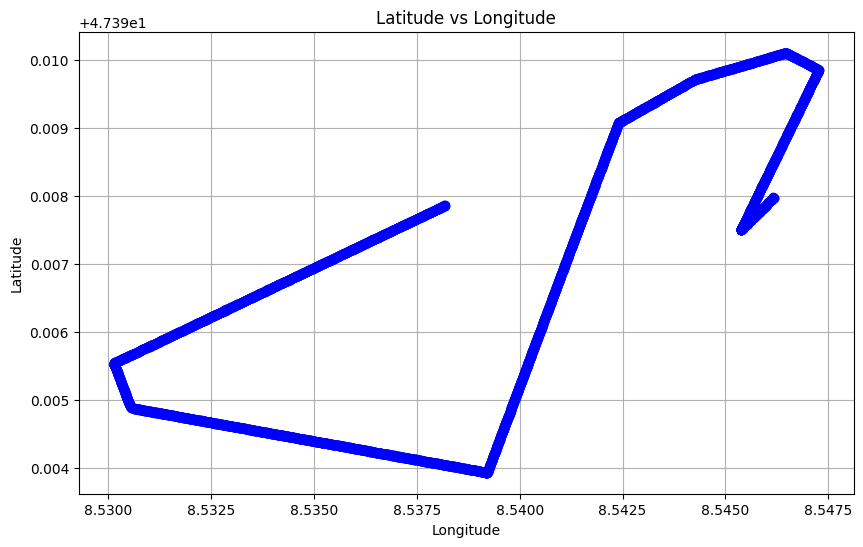

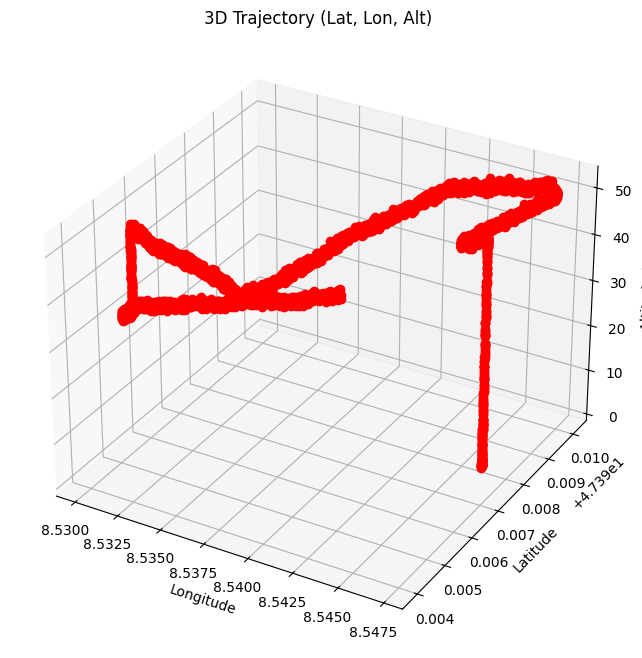

In [74]:
if __name__ == "__main__":
    main()